In [4]:
import time
import pathlib as pl
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
scripts_folder = r'D:\ProjectSpace\GitRepos\AMDC\AMDC-Firmware\scripts'
sys.path.append(scripts_folder)

from AMDC import AMDC
from AMDC_Logger import AMDC_Logger, find_mapfile

## Setup Logger
amdc = AMDC()

# Set comm defaults for UART
amdc.setup_comm_defaults('eth')

# Init ethernet 
amdc.eth_init()

# Set up the default ASCII command socket
s0, s0_id = amdc.eth_new_socket('ascii_cmd')
amdc.eth_set_default_ascii_cmd_socket(s0)

mapfile_path = find_mapfile(r'D:\ProjectSpace\GitRepos\AMDC')
logger = AMDC_Logger(AMDC = amdc, mapfile = mapfile_path)
logger.sync()

## Register variables
user_app_c_code_path = pl.Path(r'D:\ProjectSpace\GitRepos\AMDC\myCode\usr\sevenPhaseRLCC\task_sevenPhaseRLCC.c') # SET THIS TO PATH OF YOUR USER APPLICATION CODE
logger.register('LOG_Iu', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_Iv', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_Iw', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_Ix', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_Iy', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_Iz', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_Ia', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_rawIx', samples_per_sec = 10000, var_type = 'double')

logger.register('LOG_Id1', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_Iq1', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_Id3', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_Iq3', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_Id5', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_Iq5', samples_per_sec = 10000, var_type = 'double')

logger.register('LOG_Id1ref', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_Iq1ref', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_Id3ref', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_Iq3ref', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_Id5ref', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_Iq5ref', samples_per_sec = 10000, var_type = 'double')

logger.register('LOG_Vd1ref', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_Vq1ref', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_Vd3ref', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_Vq3ref', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_Vd5ref', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_Vq5ref', samples_per_sec = 10000, var_type = 'double')

#logger.register('LOG_theta_enc', samples_per_sec = 10000, var_type = 'double')
logger.info()

## Start logging
logger.empty_all()
amdc.cmd("sevenPhaseRLCC id1 0")
amdc.cmd("sevenPhaseRLCC iq1 0")
amdc.cmd("sevenPhaseRLCC id3 0")
amdc.cmd("sevenPhaseRLCC iq3 0")
amdc.cmd("sevenPhaseRLCC id5 0")
amdc.cmd("sevenPhaseRLCC iq5 0")
logger.start()
id1_ref = 0
iq1_ref1 = 2
id3_ref = 0
iq3_ref1 = 2
id5_ref = 0
iq5_ref1 = 2
freq = 20
id_ref2 = 0
iq_ref2 = 0
amdc.cmd("sevenPhaseRLCC freq {:f}".format(freq))
amdc.cmd("sevenPhaseRLCC id1 {:f}".format(id1_ref))
amdc.cmd("sevenPhaseRLCC iq1 {:f}".format(iq1_ref1))
time.sleep(2)
amdc.cmd("sevenPhaseRLCC id1 {:f}".format(id_ref2))
amdc.cmd("sevenPhaseRLCC iq1 {:f}".format(iq_ref2))
amdc.cmd("sevenPhaseRLCC id3 {:f}".format(id3_ref))
amdc.cmd("sevenPhaseRLCC iq3 {:f}".format(iq3_ref1))
time.sleep(2)
amdc.cmd("sevenPhaseRLCC id3 {:f}".format(id_ref2))
amdc.cmd("sevenPhaseRLCC iq3 {:f}".format(iq_ref2))
amdc.cmd("sevenPhaseRLCC id5 {:f}".format(id5_ref))
amdc.cmd("sevenPhaseRLCC iq5 {:f}".format(iq5_ref1))
time.sleep(2)
amdc.cmd("sevenPhaseRLCC id1 0")
amdc.cmd("sevenPhaseRLCC iq1 0")
amdc.cmd("sevenPhaseRLCC id3 0")
amdc.cmd("sevenPhaseRLCC iq3 0")
amdc.cmd("sevenPhaseRLCC id5 0")
amdc.cmd("sevenPhaseRLCC iq5 0")
logger.stop()

####################   COLLECT DATA   ####################
file_path = r'D:\ProjectSpace\GitRepos\AMDC\jupyterNotebooks\sevenPhaseTest.csv'

exp_res = logger.dump(file = file_path)


	> log info
	> log reg 0 LOG_Iu 537542912 10000 double
['log reg 0 LOG_Iu 537542912 10000 double', 'SUCCESS']
	> log reg 1 LOG_Iv 537542920 10000 double
['log reg 1 LOG_Iv 537542920 10000 double', 'SUCCESS']
	> log reg 2 LOG_Iw 537542928 10000 double
['log reg 2 LOG_Iw 537542928 10000 double', 'SUCCESS']
	> log reg 3 LOG_Ix 537542936 10000 double
['log reg 3 LOG_Ix 537542936 10000 double', 'SUCCESS']
	> log reg 4 LOG_Iy 537542944 10000 double
['log reg 4 LOG_Iy 537542944 10000 double', 'SUCCESS']
	> log reg 5 LOG_Iz 537542952 10000 double
['log reg 5 LOG_Iz 537542952 10000 double', 'SUCCESS']
	> log reg 6 LOG_Ia 537542960 10000 double
['log reg 6 LOG_Ia 537542960 10000 double', 'SUCCESS']
	> log reg 7 LOG_rawIx 537542904 10000 double
['log reg 7 LOG_rawIx 537542904 10000 double', 'SUCCESS']
	> log reg 8 LOG_Id1 537542968 10000 double
['log reg 8 LOG_Id1 537542968 10000 double', 'SUCCESS']
	> log reg 9 LOG_Iq1 537542976 10000 double
['log reg 9 LOG_Iq1 537542976 10000 double', 'SUCCESS'

Dump took: 3.905  sec
Dump rate: 10262.597  sps
Num samples: 40080 

	> log dump eth bin 14
Dumping: LOG_Id1ref
Dump took: 3.525  sec
Dump rate: 11370.305  sps
Num samples: 40080 

	> log dump eth bin 15
Dumping: LOG_Iq1ref
Dump took: 3.729  sec
Dump rate: 10747.200  sps
Num samples: 40080 

	> log dump eth bin 16
Dumping: LOG_Id3ref
Dump took: 3.495  sec
Dump rate: 11469.235  sps
Num samples: 40080 

	> log dump eth bin 17
Dumping: LOG_Iq3ref
Dump took: 3.760  sec
Dump rate: 10659.201  sps
Num samples: 40080 

	> log dump eth bin 18
Dumping: LOG_Id5ref
Dump took: 3.506  sec
Dump rate: 11431.714  sps
Num samples: 40080 

	> log dump eth bin 19
Dumping: LOG_Iq5ref
Dump took: 3.746  sec
Dump rate: 10699.547  sps
Num samples: 40080 

	> log dump eth bin 20
Dumping: LOG_Vd1ref
Dump took: 4.107  sec
Dump rate: 9759.442  sps
Num samples: 40080 

	> log dump eth bin 21
Dumping: LOG_Vq1ref
Dump took: 4.219  sec
Dump rate: 9499.399  sps
Num samples: 40080 

	> log dump eth bin 22
Dumping: LOG_V

<AxesSubplot: xlabel='t'>

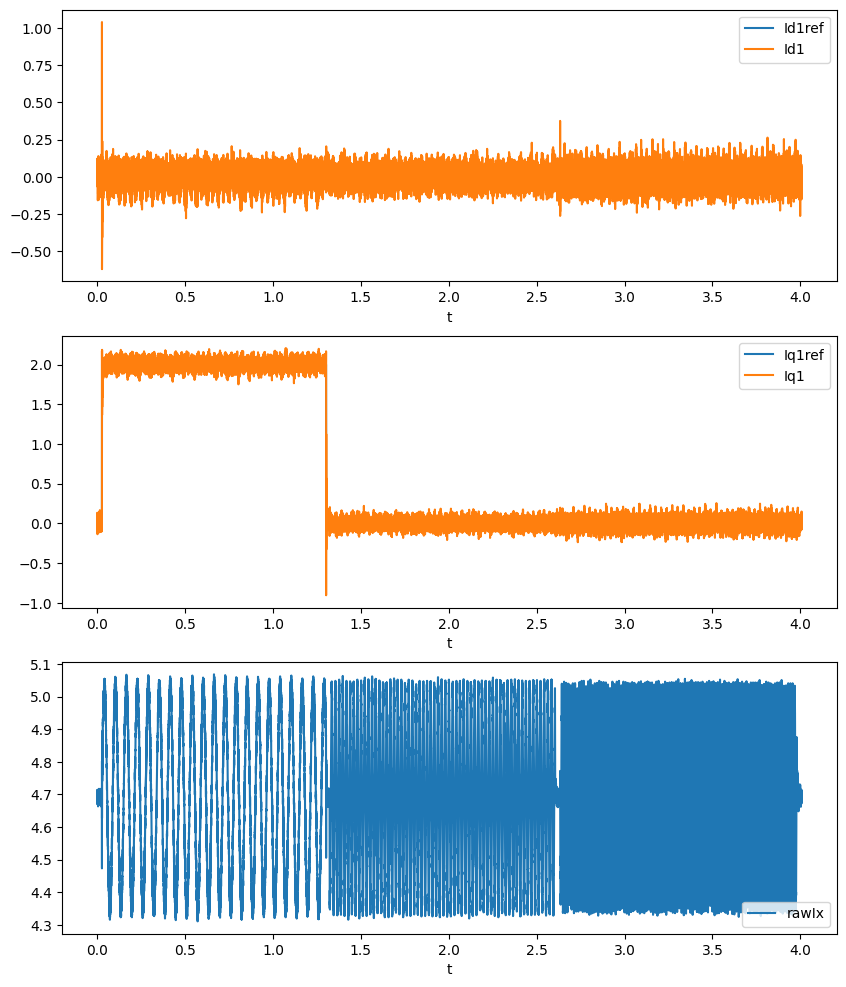

In [5]:
fig, axes = plt.subplots(3, 1)

figsize = (10,12)

tstart1 = 0
tend1 = 6

plot0 = ['Id1ref', 'Id1']
plot1 = ['Iq1ref', 'Iq1']
plot2 = ['rawIx']

exp_res[tstart1:tend1].filter(items=plot0).plot(figsize=figsize, ax=axes[0])
exp_res[tstart1:tend1].filter(items=plot1).plot(figsize=figsize, ax=axes[1])
exp_res[tstart1:tend1].filter(items=plot2).plot(figsize=figsize, ax=axes[2])

# Test 2

<AxesSubplot: xlabel='t'>

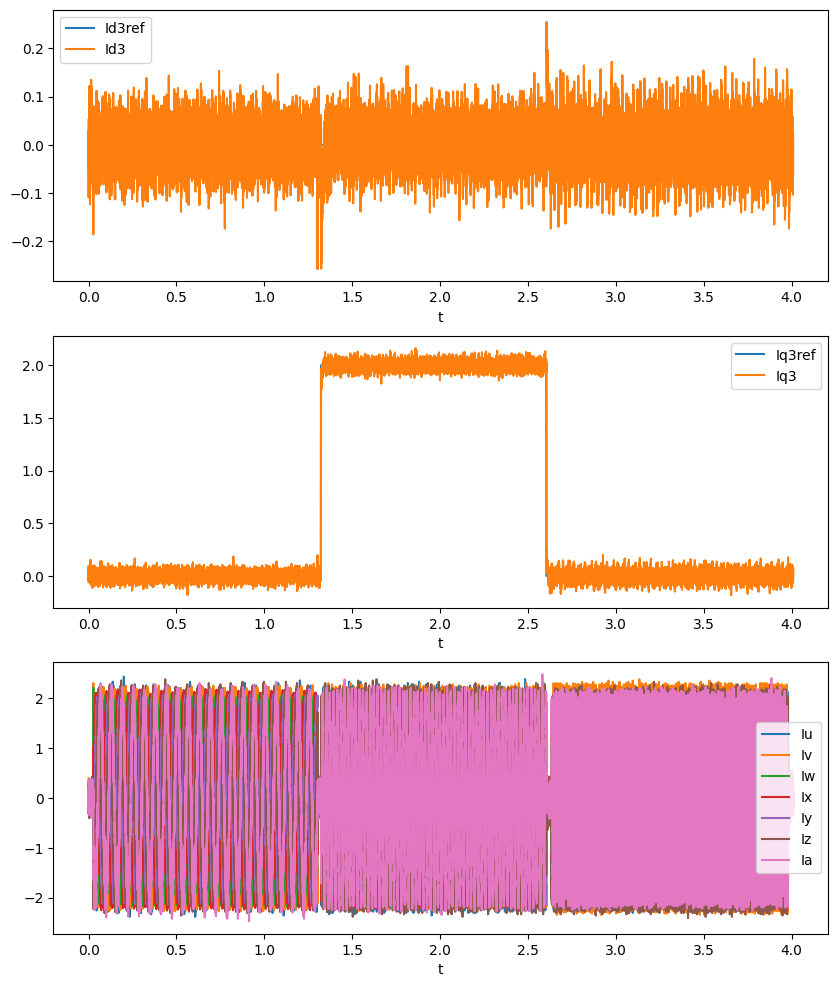

In [7]:
fig, axes = plt.subplots(3, 1)

figsize = (10,12)
tstart1 = 0
tend1 = 6

plot0 = ['Id3ref', 'Id3']
plot1 = ['Iq3ref', 'Iq3']
plot2 = ['Iu', 'Iv', 'Iw', 'Ix', 'Iy', 'Iz', 'Ia']

exp_res[tstart1:tend1].filter(items=plot0).plot(figsize=figsize, ax=axes[0])
exp_res[tstart1:tend1].filter(items=plot1).plot(figsize=figsize, ax=axes[1])
exp_res[tstart1:tend1].filter(items=plot2).plot(figsize=figsize, ax=axes[2])

<AxesSubplot: xlabel='t'>

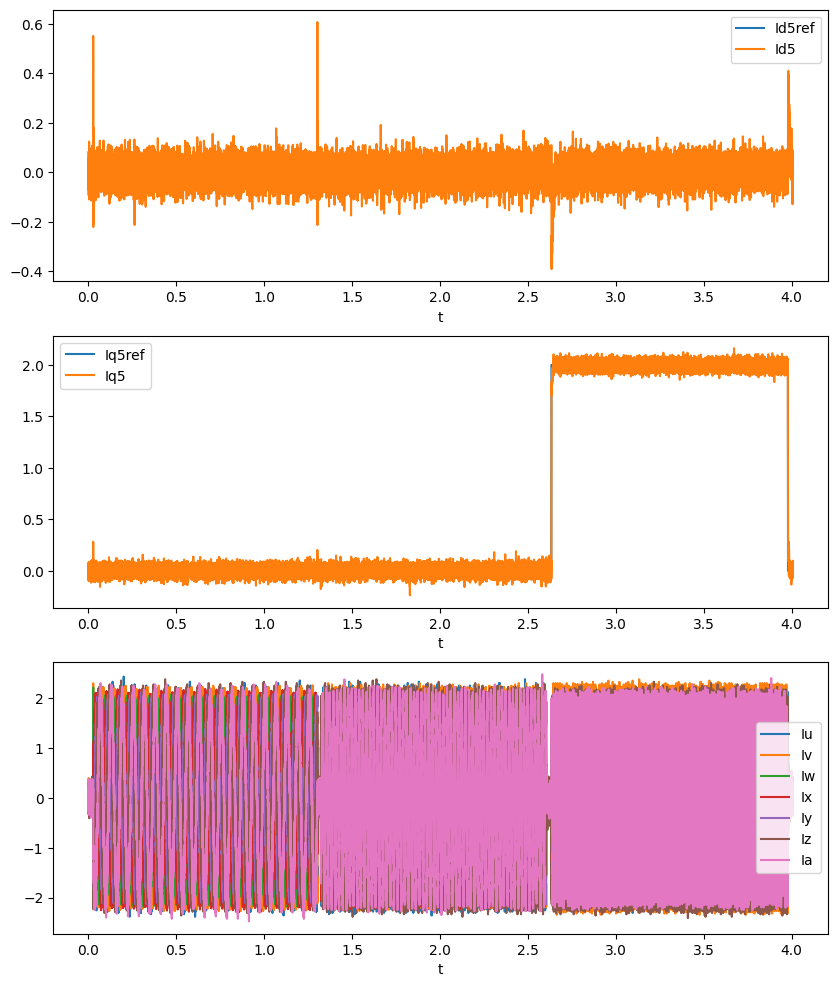

In [8]:
fig, axes = plt.subplots(3, 1)

figsize = (10,12)

tstart1 = 0
tend1 = 6

plot0 = ['Id5ref', 'Id5']
plot1 = ['Iq5ref', 'Iq5']
plot2 = ['Iu', 'Iv', 'Iw', 'Ix', 'Iy', 'Iz', 'Ia']

exp_res[tstart1:tend1].filter(items=plot0).plot(figsize=figsize, ax=axes[0])
exp_res[tstart1:tend1].filter(items=plot1).plot(figsize=figsize, ax=axes[1])
exp_res[tstart1:tend1].filter(items=plot2).plot(figsize=figsize, ax=axes[2])

In [5]:
file_path = r'D:\ProjectSpace\GitRepos\AMDC\jupyterNotebooks\sevenPhaseRLLoadTest.csv'

exp_res = logger.dump(file = file_path)

In [8]:
file_path = r'D:\ProjectSpace\GitRepos\AMDC\jupyterNotebooks\sevenPhaseTest.csv'
logger.dump(file = file_path)


In [9]:
data = pd.read_csv(file_path)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\ProjectSpace\\GitRepos\\AMDC\\jupyterNotebooks\\sevenPhaseTest.csv'